# All of Statistics: A Concise Course in Statistical Inference
## Chapter 1: Probability

Some definitions:
- Sample space (set of possible outcomes) $\Omega$
- outcome $\omega \in \Omega$
- Event $A \subseteq \Omega$ \
$\Rightarrow$ 2 coin tosses with $\Omega = \{HH,HT,TH,TT\}$ and event first toss is heads $A = \{HH,HT\}$

- Probability distribution or measure $P(A)$ for an event $A$
    - Frequency interpretation: $P(A)$ as portion of times that $A$ is true in repetitions\
    "Portion of heads is about $1/2$ as we flip the coin many times"
    - Degree of belief: $P(A)$ measures an observer's strength of belief that $A$ is true\
    "$P(A)$ evolves in belief as we flip more coins"
    
- Uniform probability distribution: For finite a sample space $\Omega$, when each outcome is equally likely\
then just count number of event outcomes $|A|$ and total number of outcomes $|\Omega|$ for $P(A) = |A|/|\Omega|$
- Given $n$ objects, the number of ways of ordering these objects is $n!$
- ${n \choose k} = \frac{n!}{k!(n-k)!}$ as number of ways choosing $k$ objects from $n$
- Independent Events: $P(AB) = P(A)P(B)$ (e.g. flip fair coin twice) / "No memory"
- Conditional Probability (A given B): $P(A|B) = \frac{P(AB)}{P(B)}$
- $P(A|B) \neq P(B|A)$, e.g. $P(+|D) \neq P(D|+)$ for $+$ be infected and $D$ receiving a test result yielding infected
- For independence $B$ does not affect $A$, i.e. $P(AB) = P(A|B)P(B) = P(B|A)P(A)$
- Bayes' Theorem: For $A_1,..., A_k$ as partition of $\Omega$ (sequence of disjoint sets):\
$P(A_i|B) = \frac{P(B|A_i)P(A_i)}{\sum_j P(B|A_j)P(A_j)}$\
with $P(A_i)$ as prior probability of $A$ and $P(A_i|B)$ as posterior probability of $A$

## Exercises:

Exercice 21:\
Suppose a coin has probability $p$ of falling heads up. If we flip the coin many times, we would expect the proportion of heads to be near $p$. \
We will make this formal later. Take $p = 0.3$ and $n = 1000$ and simulate $n$ coin flips. \
Plot the proportion of heads as a function of $n$. Repeat for $p = 0.03$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

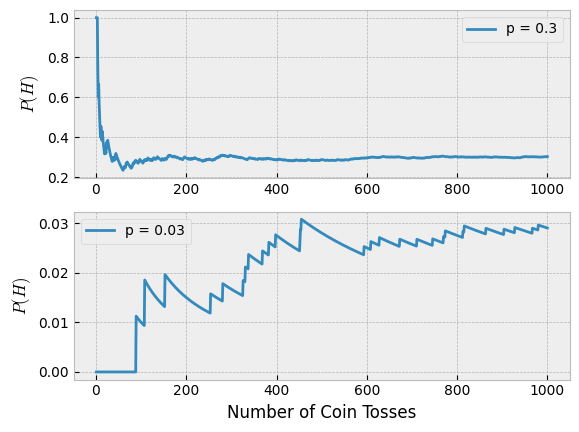

In [36]:
p1      = 0.3
p2      = 0.03
n       = 1000
n_vals  = np.arange(1,n+1)
run_p1  = np.cumsum(np.random.binomial(n=1, p=p1, size=n))/n_vals
run_p2  = np.cumsum(np.random.binomial(n=1, p=p2, size=n))/n_vals

with plt.style.context(['bmh']):

    fig = plt.figure()
    ax1  = fig.add_subplot(2,1,1)
    ax2  = fig.add_subplot(2,1,2)
    ax1.plot(n_vals, run_p1, label='p = {}'.format(p1))
    ax2.plot(n_vals, run_p2, label='p = {}'.format(p2))
    ax1.legend()
    ax2.legend()
    ax2.set_xlabel('Number of Coin Tosses')
    ax1.set_ylabel('$P(H)$')
    ax2.set_ylabel('$P(H)$')

plt.show()

Exercice 22:\
Suppose we flip a coin $n$ times and let $p$ denote the probability of heads. Let $X$ be the number of heads.\
We call $X$ a binomial random variable, which is discussed in the next chapter. Intuition suggests that $X$ will be close to $np$.\
To see if this is true, we can repeat this experiment many times and average the $X$ values.\
Carry out a simulation and compare the average of the $X$'s to $np$\
Try this for $p =0.3$ and $n = 10$, $n = 100$, and $n = 1000$.

In [107]:
p       = 0.3
n_vals  = [10, 100, 1000]
results = []

for n in n_vals:

    heads = []

    for reps in range(100):

        heads.append(np.random.binomial(n=n, p=p))

    results.append(np.mean(heads))

print(f"n \t= {n_vals[0]} \t: X = {results[0]} \t: np = {n_vals[0]*p}")
print(f"n \t= {n_vals[1]} \t: X = {results[1]} \t: np = {n_vals[1]*p}")
print(f"n \t= {n_vals[2]} \t: X = {results[2]} \t: np = {n_vals[2]*p}")

n 	= 10 	: X = 2.79 	: np = 3.0
n 	= 100 	: X = 29.83 	: np = 30.0
n 	= 1000 	: X = 298.44 	: np = 300.0


Exercise 23:\
Here we will get some experience simulating conditional probabilities. Consider tossing a fair die. Let $A = \{2, 4, 6\}$ and $B = \{1, 2, 3, 4\}$.\
Then, $P(A) = 1/2$, $P(B) = 2/3$ and $P(AB) = 1/3$. Since $P(AB) = P(A)P(B)$, the events $A$ and $B$ are independent.\
Simulate draws from the sample space and verify that $P(AB) = P(A)P(B)$ where $P(A)$ is the proportion of times $A$ occurred in the simulation and similarly for $P(AB)$ and $P(B)$.\
Now find two events $A$ and $B$ that are not independent. Compute $P(A)$, $P(B)$ and $P(AB)$. Compare the calculated values to their theoretical values.

In [102]:
# A and B are independet
n_rolls     = 1000 
die_rolls   = np.random.randint(low=1,high=7,size=n_rolls)
p_A         = len(die_rolls[die_rolls % 2 == 0])/n_rolls
p_B         = len(die_rolls[die_rolls <= 4])/n_rolls
p_AB        = len(die_rolls[(die_rolls % 2 == 0) & (die_rolls <= 4)])/n_rolls

print(f"P(A) \t\t = {p_A}")
print(f"P(B) \t\t = {p_B}")
print(f"P(A)*P(B)\t = {p_A*p_B}")
print(f"P(AB) \t\t = {p_AB}")

P(A) 		 = 0.506
P(B) 		 = 0.678
P(A)*P(B)	 = 0.34306800000000004
P(AB) 		 = 0.348


In [ ]:
# A and B are dependet
n_rolls     = 1000
die_rolls   = np.random.randint(low=1,high=7,size=n_rolls)